In [49]:
from konlpy.tag import Komoran, Okt
import pandas as pd
import random
from collections import Counter
komoran = Komoran()
# komoran = Komoran(userdic='/tmp/dic.txt')
okt = Okt()

In [173]:
import os
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud

font_dir = ['fonts']
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'NanumMyeongjo'
stopwords_1 = ['가량', '가지', '각', '간', '갖은', '개', '개국', '개년', '개소', '개월', '걔', '거', '거기', '거리', '건', '것', '겨를', '격', '겸', '고', '군', '군데', '권', '그', '그거', '그것', '그곳', '그까짓', '그네', '그녀', '그놈', '그대', '그래', '그래도', '그서', '그러나', '그러니', '그러니까', '그러다가', '그러면', '그러면서', '그러므로', '그러자', '그런', '그런 데', '그럼', '그렇지만', '그루', '그리고', '그리하여', '그분', '그이', '그쪽', '근', '근데', '글쎄', '글쎄요', '기', '김', '나', '나름', '나위', '남짓', '내', '냥', '너', '너희', '네', '네놈', '녀석', '년', '년대', '년도', '놈', '누구', '니', '다른', '다만', '단', '달', '달러', '당신', '대', '대로', '더구나', '더욱이', '데', '도', '동', '되', '두', '두세', '두어', '둥', '듯', '듯이', '등', '등등', '등지', '따라서', '따름', '따위', '딴', '때문', '또', '또는', '또한', '리', '마당', '마련', '마리', '만', '만큼', '말', '매', '맨', '명', '몇', '몇몇', '모', '모금', '모든', '무렵', '무슨', '무엇', '뭐', '뭣', '미터', '및', '바', '바람', '바퀴', '박', '발', '발짝', '번', '벌', '법', '별', '본', '부', '분', '뻔', '뿐', '살', '새', '서너', '석', '설', '섬', '세', '세기', '셈', '쇤네', '수', '순', '스무', '승', '시', '시간', '식', '씨', '아', '아냐', '아니', '아니야', '아무', '아무개', '아무런', '아아', '아이', '아이고', '아이구', '야', '약', '양', '얘', '어', '어느', '어디', '어머', '언제', '에이', '엔', '여기', '여느', '여러', '여러분', '여보', '여보세요', '여지', '역시', '예', '옛', '오', '오랜', '오히려', '온', '온갖', '올', '왜냐하면', '왠', '외', '요', '우리', '원', '월', '웬', '위', '음', '응', '이', '이거', '이것', '이곳', '이놈', '이래', '이런', '이런저런', '이른바', '이리하여', '이쪽', '일', '일대', '임마', '자', '자기', '자네', '장', '저', '저것', '저기', '저놈', '저런', '저쪽', '저편', '저희', '적', '전', '점', '제', '조', '주', '주년', '주일', '줄', '중', '즈음', '즉', '지', '지경', '지난', '집', '짝', '쪽', '쯤', '차', '참', '채', '척', '첫', '체', '초', '총', '측', '치', '큰', '킬로미터', '타', '터', '턱', '톤', '통', '투', '판', '퍼센트', '편', '평', '푼', '하기야', '하긴', '하물며', '하지만', '한', '한두', '한편', '허허', '헌', '현', '호', '혹은', '회', '흥']
stopwords_2 = ['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어', '든간에', '들', '등', '등등', '딩동', '따라', '따라서', '따위', '따지지 않다', '딱', '때', '때가 되어', '때문에', '또', '또한', '뚝뚝', '라 해도', '령', '로', '로 인하여', '로부터', '로써', '륙', '를', '마음대로', '마저', '마저도', '마치', '막론하고', '만 못하다', '만약', '만약에', '만은 아니다', '만이 아니다', '만일', '만큼', '말하자면', '말할것도 없고', '매', '매번', '메쓰겁다', '몇', '모', '모두', '무렵', '무릎쓰고', '무슨', '무엇', '무엇때문에', '물론', '및', '바꾸어말하면', '바꾸어말하자면', '바꾸어서 말하면', '바꾸어서 한다면', '바꿔 말하면', '바로', '바와같이', '밖에 안된다', '반대로', '반대로 말하자면', '반드시', '버금', '보는데서', '보다더', '보드득', '본대로', '봐', '봐라', '부류의 사람들', '부터', '불구하고', '불문하고', '붕붕', '비걱거리다', '비교적', '비길수 없다', '비로소', '비록', '비슷하다', '비추어 보아', '비하면', '뿐만 아니라', '뿐만아니라', '뿐이다', '삐걱', '삐걱거리다', '사', '삼', '상대적으로 말하자면', '생각한대로', '설령', '설마', '설사', '셋', '소생', '소인', '솨', '쉿', '습니까', '습니다', '시각', '시간', '시작하여', '시초에', '시키다', '실로', '심지어', '아', '아니', '아니나다를가', '아니라면', '아니면', '아니었다면', '아래윗', '아무거나', '아무도', '아야', '아울러', '아이', '아이고', '아이구', '아이야', '아이쿠', '아하', '아홉', '안 그러면', '않기 위하여', '않기 위해서', '알 수 있다', '알았어', '앗', '앞에서', '앞의것', '야', '약간', '양자', '어', '어기여차', '어느', '어느 년도', '어느것', '어느곳', '어느때', '어느쪽', '어느해', '어디', '어때', '어떠한', '어떤', '어떤것', '어떤것들', '어떻게', '어떻해', '어이', '어째서', '어쨋든', '어쩔수 없다', '어찌', '어찌됏든', '어찌됏어', '어찌하든지', '어찌하여', '언제', '언젠가', '얼마', '얼마 안 되는 것', '얼마간', '얼마나', '얼마든지', '얼마만큼', '얼마큼', '엉엉', '에', '에 가서', '에 달려 있다', '에 대해', '에 있다', '에 한하다', '에게', '에서', '여', '여기', '여덟', '여러분', '여보시오', '여부', '여섯', '여전히', '여차', '연관되다', '연이서', '영', '영차', '옆사람', '예', '예를 들면', '예를 들자면', '예컨대', '예하면', '오', '오로지', '오르다', '오자마자', '오직', '오호', '오히려', '와', '와 같은 사람들', '와르르', '와아', '왜', '왜냐하면', '외에도', '요만큼', '요만한 것', '요만한걸', '요컨대', '우르르', '우리', '우리들', '우선', '우에 종합한것과같이', '운운', '월', '위에서 서술한바와같이', '위하여', '위해서', '윙윙', '육', '으로', '으로 인하여', '으로서', '으로써', '을', '응', '응당', '의', '의거하여', '의지하여', '의해', '의해되다', '의해서', '이', '이 되다', '이 때문에', '이 밖에', '이 외에', '이 정도의', '이것', '이곳', '이때', '이라면', '이래', '이러이러하다', '이러한', '이런', '이럴정도로', '이렇게 많은 것', '이렇게되면', '이렇게말하자면', '이렇구나', '이로 인하여', '이르기까지', '이리하여', '이만큼', '이번', '이봐', '이상', '이어서', '이었다', '이와 같다', '이와 같은', '이와 반대로', '이와같다면', '이외에도', '이용하여', '이유만으로', '이젠', '이지만', '이쪽', '이천구', '이천육', '이천칠', '이천팔', '인 듯하다', '인젠', '일', '일것이다', '일곱', '일단', '일때', '일반적으로', '일지라도', '임에 틀림없다', '입각하여', '입장에서', '잇따라', '있다', '자', '자기', '자기집', '자마자', '자신', '잠깐', '잠시', '저', '저것', '저것만큼', '저기', '저쪽', '저희', '전부', '전자', '전후', '점에서 보아', '정도에 이르다', '제', '제각기', '제외하고', '조금', '조차', '조차도', '졸졸', '좀', '좋아', '좍좍', '주룩주룩', '주저하지 않고', '줄은 몰랏다', '줄은모른다', '중에서', '중의하나', '즈음하여', '즉', '즉시', '지든지', '지만', '지말고', '진짜로', '쪽으로', '차라리', '참', '참나', '첫번째로', '쳇', '총적으로', '총적으로 말하면', '총적으로 보면', '칠', '콸콸', '쾅쾅', '쿵', '타다', '타인', '탕탕', '토하다', '통하여', '툭', '퉤', '틈타', '팍', '팔', '퍽', '펄렁', '하', '하게될것이다', '하게하다', '하겠는가', '하고 있다', '하고있었다', '하곤하였다', '하구나', '하기 때문에', '하기 위하여', '하기는한데', '하기만 하면', '하기보다는', '하기에', '하나', '하느니', '하는 김에', '하는 편이 낫다', '하는것도', '하는것만 못하다', '하는것이 낫다', '하는바', '하더라도', '하도다', '하도록시키다', '하도록하다', '하든지', '하려고하다', '하마터면', '하면 할수록', '하면된다', '하면서', '하물며', '하여금', '하여야', '하자마자', '하지 않는다면', '하지 않도록', '하지마', '하지마라', '하지만', '하하', '한 까닭에', '한 이유는', '한 후', '한다면', '한다면 몰라도', '한데', '한마디', '한적이있다', '한켠으로는', '한항목', '할 따름이다', '할 생각이다', '할 줄 안다', '할 지경이다', '할 힘이 있다', '할때', '할만하다', '할망정', '할뿐', '할수있다', '할수있어', '할줄알다', '할지라도', '할지언정', '함께', '해도된다', '해도좋다', '해봐요', '해서는 안된다', '해야한다', '해요', '했어요', '향하다', '향하여', '향해서', '허', '허걱', '허허', '헉', '헉헉', '헐떡헐떡', '형식으로 쓰여', '혹시', '혹은', '혼자', '훨씬', '휘익', '휴', '흐흐', '흥', '힘입어']
stopwords_3 = ['경향신문', '국민일보', '내일신문', '동아일보', '문화일보', '서울신문', '세계일보', '조선일보', '중앙일보', '한겨레', '한국일보', '강원도민일보', '강원일보', '경기일보', '경남도민일보', '경남신문', '경남일보', '경북도민일보', '경북매일신문', '경북일보', '경상일보', '경인일보', '광주매일', '광주일보', '국제신문', '기호일보', '남도일보', '대구신문', '대구일보', '대전일보', '동양일보', '매일신문', '무등일보', '부산일보', '새전북신문', '영남일보', '울산매일', '울산신문', '인천일보', '전남일보', '전북도민일보', '전북일보', '전라일보', '제민일보', '제주일보', '중도일보', '중부매일', '중부일보', '충북일보', '충청일보', '충청투데이', '한라일보', '매일경제', '머니투데이', '서울경제', '아시아경제', '아주경제', '이데일리', '이투데이', '파이낸셜뉴스', '한국경제', '헤럴드경제', 'e대한경제', '스포츠경향', '스포츠동아', '스포츠서울', '스포츠월드', '일간스포츠', '중앙데일리', '코리아타임스', '코리아헤럴드', '디지털타임스', '소년한국일보', '어린이강원', '어린이동아', '전자신문', '환경일보', '농민신문', '기자협회보', '미디어오늘', '일요신문', '중앙선데이', '주간한국', '당진시대', '옥천신문', '홍성신문', '광양신문', '김포신문', '뉴스서천', '영암우리신문', '영주시민신문', '원주투데이', '주간고양신문', '주간설악신문', '평택시민신문', '노컷뉴스', '뉴스핌', '대덕넷', '데일리안', 'BreakNews', 'EBN산업뉴스', 'PD저널', 'KBS', 'MBC', 'SBS', 'YTN', 'OBS']
stopwords_4 = ['조선일보', '스포츠조선', '소년조선일보', '동아일보', '스포츠동아', '어린이동아', '중앙일보', '일간스포츠', '중앙 SUNDAY', '중앙데일리', '한국일보', '코리아 타임즈', '소년한국일보', '경향신문', '서울신문', '스포츠서울', '한겨레', '국민일보', '세계일보', '스포츠월드', '문화일보', '디지털타임즈', '내일신문', '신아일보', '아시아투데이', '천지일보', '스포츠조선', '스포츠동아', '일간스포츠', '스포츠서울', '스포츠경향', '스포츠월드', '컬처타임즈', '매일경제신문', '한국경제신문', '서울경제신문', '헤럴드경제', '아시아경제', '파이낸셜뉴스', '이투데이', '머니투데이', '데일리경제', '아주경제', '중부일보', '인천일보', '기호일보', '경인일보', '경인매일신문', '경기일보', '경기신문', '충청일보', '충청투데이', '충청매일', '중도일보', '중부매일', '대전일보', '동양일보', '금강일보', '충남일보', '충북일보', '오산인터넷뉴스', '충청타임즈', '충민일보', '충청신문', '충청도민신문', '대전투데이', '모두서치', '경남신문', '경남일보', '경북일보', '경남매일', '경남도민일보', '경북도민일보', '경북매일신문', '대구연합일보', '한남일보', '경산신문', '경상일보', '경안일보', '창원일보', '국제신문', '대구신문', '부산일보', '매일신문', '영남신문', '울산매일', '울산신문', '일간뉴스경남', '울산제일일보', '신울산일보', 'TK신문', '대경일보', '부산파이낸셜뉴스', '경남도민신문', '광남일보', '광주일보', '광주타임스', '광주매일신문', '전주일보', '전북일보', '전남일보', '전북중앙신문', '전북도민일보', '호남신문', '무등일보', '전남매일', '호남매일', '전북중앙신문', '전민일보', '새전북신문', '전라매일', '남도일보', '서남일보', '호남제일신문', '조간호남일보', '광주드림', '광주전남아침신문', '전북연합신문', '전광일보', '전북타임스', '일간광주신문', '전남도민일보', '전북매일신문', '매일광주신문', '남도투데이', '새만금일보', '희망일보', '강원일보', '강원도민일보', '제주신문', '제민일보', '한라일보', '제주매일', '제주일보', '코리아타임스', '코리아헤럴드', '중앙데일리', '전자신문', '디지털타임스', '국방일보', '에너지경제신문', '환경일보', '한국에너지신문', '투데이에너지', '에너지신문', '법률신문', '일요신문', '중앙 SUNDAY', '파이낸셜경제신문', '미디어오늘', '기자협회보', '여성신문', '여성소비자신문', '여성경제신문', '철도신문', '국토매일', '교통신문', '노동자연대', '아트타임즈', '우리들의 스타', '법률신문', '메트로', '이데일리', 'AsiaN', '경제투데이', '노컷뉴스', '뉴데일리', '뉴스핌', '데일리NK', '데일리안', '딴지일보', '레디앙', '마이데일리', '미디어스', '민중의소리', 'views&news', '브레이크뉴스', '새파란뉴스', '아이비타임즈 코리아', 'OhmyNews', 'PD저널', '문자와문화', '이데일리', 'JPNews', '참세상', '코나스', '코리아옵저버', '쿠키뉴스', '컬처타임즈', '프레시안', 'GO발뉴스', '신문고뉴스']
stopwords_5 = ['.ac', '.ac.uk', '.ad', '.ae', '.aero', '.af', '.ag', '.ai', '.al', '.am', '.an', '.ao', '.aq', '.ar', '.arpa', '.as', '.asia', '.at', '.au', '.aw', '.ax', '.az', '.ba', '.bb', '.bd', '.be', '.bf', '.bg', '.bh', '.bi', '.biz', '.bj', '.bm', '.bn', '.bo', '.br', '.bs', '.bt', '.bv', '.bw', '.by', '.bz', '.ca', '.cat', '.cc', '.cd', '.cf', '.cg', '.ch', '.ci', '.ck', '.cl', '.cm', '.cn', '.co', '.co.uk', '.com', '.coop', '.cr', '.cs', '.cu', '.cv', '.cw', '.cx', '.cy', '.cz', '.dd', '.de', '.dj', '.dk', '.dm', '.do', '.dz', '.ec', '.edu', '.ee', '.eg', '.eh', '.er', '.es', '.et', '.eu', '.fi', '.firm', '.fj', '.fk', '.fm', '.fo', '.fr', '.fx', '.ga', '.gb', '.gd', '.ge', '.gf', '.gg', '.gh', '.gi', '.gl', '.gm', '.gn', '.gov', '.gov.uk', '.gp', '.gq', '.gr', '.gs', '.gt', '.gu', '.gw', '.gy', '.hk', '.hm', '.hn', '.hr', '.ht', '.hu', '.id', '.ie', '.il', '.im', '.in', '.info', '.int', '.io', '.iq', '.ir', '.is', '.it', '.je', '.jm', '.jo', '.jobs', '.jp', '.ke', '.kg', '.kh', '.ki', '.km', '.kn', '.kp', '.kr', '.kw', '.ky', '.kz', '.la', '.lb', '.lc', '.li', '.lk', '.lr', '.ls', '.lt', '.ltd.uk', '.lu', '.lv', '.ly', '.ma', '.mc', '.md', '.me', '.me.uk', '.mg', '.mh', '.mil', '.mk', '.ml', '.mm', '.mn', '.mo', '.mobi', '.mod.uk', '.mp', '.mq', '.mr', '.ms', '.mt', '.mu', '.museum', '.mv', '.mw', '.mx', '.my', '.mz', '.na', '.name', '.nato', '.nc', '.ne', '.net', '.net.uk', '.nf', '.ng', '.nhs.uk', '.ni', '.nl', '.no', '.nom', '.np', '.nr', '.nt', '.nu', '.nz', '.om', '.org', '.org.uk', '.pa', '.pe', '.pf', '.pg', '.ph', '.pk', '.pl', '.plc.uk', '.pm', '.pn', '.post', '.pr', '.pro', '.ps', '.pt', '.pw', '.py', '.qa', '.re', '.ro', '.rs', '.ru', '.rw', '.sa', '.sb', '.sc', '.sch.uk', '.sd', '.se', '.sg', '.sh', '.si', '.sj', '.sk', '.sl', '.sm', '.sn', '.so', '.sr', '.ss', '.st', '.store', '.su', '.sv', '.sy', '.sz', '.tc', '.td', '.tel', '.tf', '.tg', '.th', '.tj', '.tk', '.tl', '.tm', '.tn', '.to', '.tp', '.tr', '.travel', '.tt', '.tv', '.tw', '.tz', '.ua', '.ug', '.uk', '.um', '.us', '.uy', '.uz', '.va', '.vc', '.ve', '.vg', '.vi', '.vn', '.vu', '.web', '.wf', '.ws', '.xxx', '.ye', '.yt', '.yu', '.za', '.zm', '.zr', '.zw']
stopwords = stopwords_1 + stopwords_2 + stopwords_3 + stopwords_4 + stopwords_5

def show_wordcloud(sample):
    text = sample
    wordcloud = WordCloud(
        font_path='fonts/NanumMyeongjo.ttf', 
        width=640, 
        height=480, 
        max_words=200, 
        stopwords=stopwords, 
        collocations=True, 
        collocation_threshold=3,
        background_color='white', 
        mode='RGBA', 
        ).generate(text) # generate_from_frequencies # generate
    image = wordcloud.to_image()
    image.show()
    
def show_wordcloud_from_frequencies(sample):
    text = sample
    wordcloud = WordCloud(
        font_path='fonts/NanumMyeongjo.ttf', 
        width=640, 
        height=480, 
        max_words=200, 
        stopwords=stopwords, 
        collocations=True, 
        collocation_threshold=1,
        background_color='white', 
        mode='RGBA', 
        ).generate_from_frequencies(text) # generate_from_frequencies # generate
    image = wordcloud.to_image()
    image.show()

In [188]:
data = pd.read_csv('results/인공지능_문화체육관광부_클라썸/top_5_orgs_and_their_news.csv')
sample = data.content.iloc[random.randrange(len(data))]
title = data.target.iloc[random.randrange(len(data))]
keyword = data.keyword.iloc[random.randrange(len(data))]

In [191]:
with open('results/userdic.txt', 'w') as f:
    print(title, file=f)
    print(keyword, file=f)
    
komoran = Komoran(userdic='results/userdic.txt')
# komoran = Komoran()
okt = Okt()

한국콘텐츠진흥원


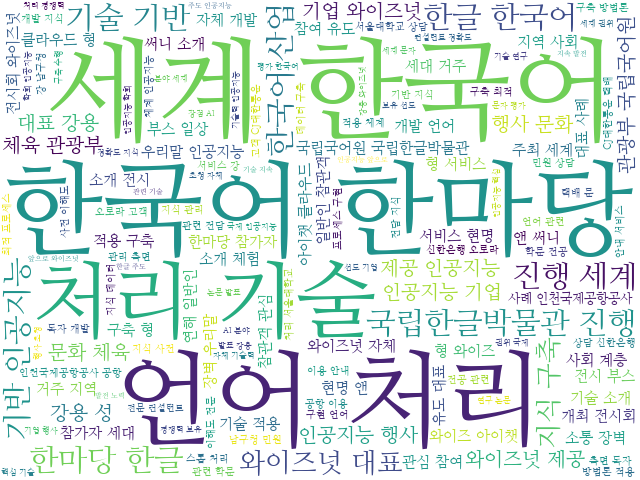

In [194]:
result = ' '.join(komoran.nouns(sample))
print(title)
show_wordcloud(result)

In [185]:
# result = ' '.join(okt.nouns(sample))
# print(title)
# show_wordcloud(result)

In [187]:
# result = komoran.nouns(sample)
# result = Counter(result)
# print(title)
# show_wordcloud_from_frequencies(result)

In [186]:
# result = okt.nouns(sample)
# result = Counter(result)
# print(title)
# show_wordcloud_from_frequencies(result)